In [ ]:
import networkx as nx
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
%matplotlib inline

In [ ]:
dataset = 'data1.csv'

In [ ]:
G = nx.Graph()

In [ ]:
def graph_built_undirected(dataset):
  df = pd.read_csv(dataset)
  edges=[]
  for i in range(len(df)):
    edges.append((df.Source[i],df.Destination[i],int(df.Weight[i])))

  G.add_weighted_edges_from(edges)
  edge_labels = nx.get_edge_attributes(G, "weight")
  # getting different graph attributes
  print("Total number of nodes: ", int(G.number_of_nodes()))
  print("Total number of edges: ", int(G.number_of_edges()))
  print("List of all nodes: ", list(G.nodes()))
  print("List of all edges: ", list(G.edges()))
  print("Degree for all nodes: ", dict(G.degree()))
  print("Maximum Degree Node: ", max(zip(dict(G.degree()).values(), dict(G.degree()).keys()))[1])
  print("Minimum Degree Node: ", min(zip(dict(G.degree()).values(), dict(G.degree()).keys()))[1])
  nx.draw_networkx(G, with_labels = True)
  plt.savefig("Undirected_Graph.png", format="PNG")
  

Total number of nodes:  6
Total number of edges:  8
List of all nodes:  [1, 4, 2, 0, 3, 5]
List of all edges:  [(1, 4), (1, 2), (1, 5), (1, 1), (4, 2), (2, 0), (0, 3), (3, 5)]
Degree for all nodes:  {1: 5, 4: 2, 2: 3, 0: 2, 3: 2, 5: 2}
Maximum Degree Node:  1
Minimum Degree Node:  0


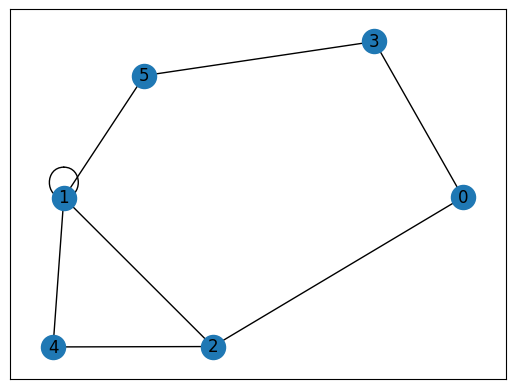

In [ ]:
graph_built_undirected(dataset)

In [ ]:
G2= nx.DiGraph()

In [ ]:
def graph_built_directed(dataset):
  edges=[]
  df = pd.read_csv(dataset)
  for i in range(len(df)):
    edges.append((df.Source[i],df.Destination[i]))

  G2.add_edges_from(edges)
  # getting different graph attributes
  print("Total number of nodes: ", int(G2.number_of_nodes()))
  print("Total number of edges: ", int(G2.number_of_edges()))
  print("List of all nodes: ", list(G2.nodes()))
  print("List of all edges: ", list(G2.edges()))
  print("In-degree for all nodes: ", dict(G2.in_degree()))  
  print("Out degree for all nodes: ", dict(G2.out_degree))
  #print("Max In Degree Node: ", max(zip(dict(G2.in_degree()).values(), dict(G2.in_degree()).keys()))[1])
  #print("Min In Degree Node: ", min(zip(dict(G2.in_degree()).values(), dict(G2.in_degree()).keys()))[1])
  #print("Max Out Degree Node: ", max(zip(dict(G2.out_degree()).values(), dict(G2.out_degree()).keys()))[1])
  #print("Min Out Degree Node: ", min(zip(dict(G2.out_degree()).values(), dict(G2.out_degree()).keys()))[1])
  nx.draw_networkx(G2, with_labels = True)
  plt.savefig("Directed_Graph.png", format="PNG")

Total number of nodes:  6
Total number of edges:  9
List of all nodes:  [1, 4, 2, 0, 3, 5]
List of all edges:  [(1, 4), (1, 1), (4, 2), (2, 1), (2, 0), (0, 3), (0, 2), (3, 5), (5, 1)]
In-degree for all nodes:  {1: 3, 4: 1, 2: 2, 0: 1, 3: 1, 5: 1}
Out degree for all nodes:  {1: 2, 4: 1, 2: 2, 0: 2, 3: 1, 5: 1}


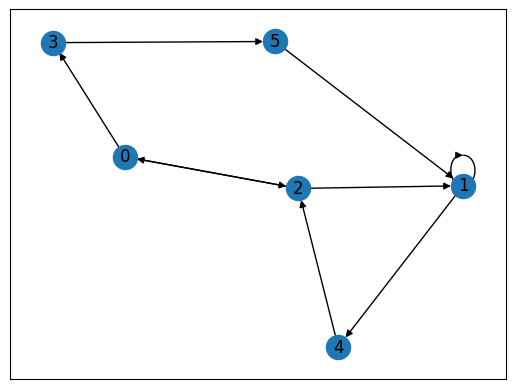

In [ ]:
graph_built_directed(dataset)

In [ ]:
def undirected_Adj_matrix(G):
  undirected_Adj_mat = nx.adjacency_matrix(G)
  print(undirected_Adj_mat.todense())
  udg_node = int(input("Enter Node: "))
  udg_sum = 0
  for i in range(len(undirected_Adj_mat.todense()[udg_node])):
    udg_sum = udg_sum +  int(undirected_Adj_mat.todense()[udg_node][i])
  print(f"Sum for Node {udg_node} is {udg_sum}")

In [ ]:
undirected_Adj_matrix(G)

[[0 3 1 0 0 5]
 [3 0 4 0 0 0]
 [1 4 0 1 0 0]
 [0 0 1 0 2 0]
 [0 0 0 2 0 2]
 [5 0 0 0 2 0]]
Enter Node: 0
Sum for Node 0 is 9


In [ ]:
def directed_Adj_matrix(G):
  directed_Adj_mat = nx.adjacency_matrix(G2)
  print(directed_Adj_mat.todense())

  dg_node = int(input("Enter Node: "))

  dg_sum = 0
  for i in range(len(directed_Adj_mat.todense()[dg_node])):
    dg_sum = dg_sum +  int(directed_Adj_mat.todense()[dg_node][i])

  for i in range(len(directed_Adj_mat.todense()[dg_node])):
    dg_sum = dg_sum +  int(directed_Adj_mat.todense()[i][dg_node])
   
  print(f"Sum for Node {dg_node} is {dg_sum}")

In [ ]:
directed_Adj_matrix(G2)

[[1 1 0 0 0 0]
 [0 0 1 0 0 0]
 [1 0 0 1 0 0]
 [0 0 1 0 1 0]
 [0 0 0 0 0 1]
 [1 0 0 0 0 0]]
Enter Node: 1
Sum for Node 1 is 2


In [ ]:
def dict_round(s_r_dict):
  s_r_dict = dict(sorted(s_r_dict.items()))
  for key in s_r_dict:
    s_r_dict[key] = round(s_r_dict[key], 2)
  return s_r_dict

Undirected Graph

In [ ]:
deg_centrality = nx.degree_centrality(G)
print(deg_centrality)
udg_deg_centrality = dict_round(deg_centrality)
print(udg_deg_centrality)

{1: 1.0, 4: 0.4, 2: 0.6000000000000001, 0: 0.4, 3: 0.4, 5: 0.4}
{0: 0.4, 1: 1.0, 2: 0.6, 3: 0.4, 4: 0.4, 5: 0.4}


In [ ]:
closeness_centrality = nx.closeness_centrality(G)
print(closeness_centrality)
udg_closeness_centrality = dict_round(closeness_centrality)
print(udg_closeness_centrality)

{1: 0.7142857142857143, 4: 0.5555555555555556, 2: 0.7142857142857143, 0: 0.625, 3: 0.5555555555555556, 5: 0.625}
{0: 0.62, 1: 0.71, 2: 0.71, 3: 0.56, 4: 0.56, 5: 0.62}


In [ ]:
betweeness_centrality = nx.closeness_centrality(G)
print(betweeness_centrality)
udg_betweeness_centrality = dict_round(betweeness_centrality)
print(udg_betweeness_centrality)

{1: 0.7142857142857143, 4: 0.5555555555555556, 2: 0.7142857142857143, 0: 0.625, 3: 0.5555555555555556, 5: 0.625}
{0: 0.62, 1: 0.71, 2: 0.71, 3: 0.56, 4: 0.56, 5: 0.62}


In [ ]:
eigen_vector_centrality = nx.eigenvector_centrality(G)
print(eigen_vector_centrality)
udg_eigen_vector_centrality = dict_round(eigen_vector_centrality)
print(udg_eigen_vector_centrality)

{1: 0.6577149283774613, 4: 0.40320751190658505, 2: 0.46582976382070757, 0: 0.23711912867641421, 3: 0.19490403001031745, 5: 0.3059809542630902}
{0: 0.24, 1: 0.66, 2: 0.47, 3: 0.19, 4: 0.4, 5: 0.31}


In [ ]:
udf = pd.DataFrame.from_dict(udg_deg_centrality,orient='index',columns=['Degree_Centrality'])
udf = udf.assign(Closeness_Centrality= udg_closeness_centrality.values())
udf = udf.assign(Betweeness_Centrality= udg_betweeness_centrality.values())
udf = udf.assign(Eigen_Vector_Centrality= udg_eigen_vector_centrality.values())

In [ ]:
udf

,Degree_Centrality,Closeness_Centrality,Betweeness_Centrality,Eigen_Vector_Centrality
0,0.4,0.62,0.62,0.24
1,1.0,0.71,0.71,0.66
2,0.6,0.71,0.71,0.47
3,0.4,0.56,0.56,0.19
4,0.4,0.56,0.56,0.40
5,0.4,0.62,0.62,0.31


In [ ]:
udf.to_csv('All Centality Degrees (Undirected Graph).csv')

In [ ]:
def find_node_min_centarlity(udf,cent_name):
  min = 100
  node_min = -1
  for i in range(len(udf)):
    if udf[cent_name][i] < min:
      min =  udf[cent_name][i]
      node_min = i
  return node_min,min

def find_node_max_centarlity(udf,cent_name):
  max = 0
  node_max = -1
  for i in range(len(udf)):
    if udf[cent_name][i] > max:
      max =  udf[cent_name][i]
      node_max = i
  return node_max,max

In [ ]:
node_min,min = find_node_min_centarlity(udf,'Degree_Centrality')
node_max,max = find_node_max_centarlity(udf,'Degree_Centrality')
print(node_min,min)
print(node_max,max)
degree_cent_min_max = {'Min Degree Node':str(node_min),'Value C1':min,'Max Degree Node':str(node_max),'Value C2':max}

0 0.4
1 1.0


In [ ]:
node_min,min = find_node_min_centarlity(udf,'Closeness_Centrality')
node_max,max = find_node_max_centarlity(udf,'Closeness_Centrality')
print(node_min,min)
print(node_max,max)
closeness_cent_min_max = {'Min Degree Node':str(node_min),'Value C1':min,'Max Degree Node':str(node_max),'Value C2':max}

3 0.56
1 0.71


In [ ]:
node_min,min = find_node_min_centarlity(udf,'Betweeness_Centrality')
node_max,max = find_node_max_centarlity(udf,'Betweeness_Centrality')
print(node_min,min)
print(node_max,max)
betweeness_cent_min_max = {'Min Degree Node':str(node_min),'Value C1':min,'Max Degree Node':str(node_max),'Value C2':max}

3 0.56
1 0.71


In [ ]:
node_min,min = find_node_min_centarlity(udf,'Eigen_Vector_Centrality')
node_max,max = find_node_max_centarlity(udf,'Eigen_Vector_Centrality')
print(node_min,min)
print(node_max,max)
eigen_vector_cent_min_max = {'Min Degree Node':str(node_min),'Value C1':min,'Max Degree Node':str(node_max),'Value C2':max}

3 0.19
1 0.66


In [ ]:
udf_min_max = pd.DataFrame(columns=['Min Degree Node','Value C1','Max Degree Node','Value C2'])

udf_min_max

,Min Degree Node,Value C1,Max Degree Node,Value C2


Min Degree Node	Value C1	Max Degree Node	Value C2


In [ ]:
udf_min_max = udf_min_max.append(pd.Series(degree_cent_min_max,index = udf_min_max.columns,name = 'Degree Centrality'))
udf_min_max = udf_min_max.append(pd.Series(closeness_cent_min_max,index = udf_min_max.columns,name = 'Closeness Centrality'))
udf_min_max = udf_min_max.append(pd.Series(betweeness_cent_min_max,index = udf_min_max.columns,name = 'Betweeness Centrality'))
udf_min_max = udf_min_max.append(pd.Series(eigen_vector_cent_min_max,index = udf_min_max.columns,name = 'Eigen Vector Centrality'))
udf_min_max

<ipython-input-27-f63f0aa390aa>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  udf_min_max = udf_min_max.append(pd.Series(degree_cent_min_max,index = udf_min_max.columns,name = 'Degree Centrality'))
<ipython-input-27-f63f0aa390aa>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  udf_min_max = udf_min_max.append(pd.Series(closeness_cent_min_max,index = udf_min_max.columns,name = 'Closeness Centrality'))
<ipython-input-27-f63f0aa390aa>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  udf_min_max = udf_min_max.append(pd.Series(betweeness_cent_min_max,index = udf_min_max.columns,name = 'Betweeness Centrality'))
<ipython-input-27-f63f0aa390aa>:4: FutureWarning: The frame.append method is deprecated and will be removed from pan

,Min Degree Node,Value C1,Max Degree Node,Value C2
Degree Centrality,0,0.40,1,1.00
Closeness Centrality,3,0.56,1,0.71
Betweeness Centrality,3,0.56,1,0.71
Eigen Vector Centrality,3,0.19,1,0.66


In [ ]:
'''
udf_min_max = udf_min_max.assign(index= udf.columns)
udf_min_max = udf_min_max.set_index(udf_min_max['index'])
udf_min_max.drop(columns=['index'])

'''

"\nudf_min_max = udf_min_max.assign(index= udf.columns)\nudf_min_max = udf_min_max.set_index(udf_min_max['index'])\nudf_min_max.drop(columns=['index'])\n\n"

Directed Graph

In [ ]:
deg_centrality = nx.degree_centrality(G2)
print(deg_centrality)
dg_deg_centrality = dict_round(deg_centrality)
print(dg_deg_centrality)

{1: 1.0, 4: 0.4, 2: 0.8, 0: 0.6000000000000001, 3: 0.4, 5: 0.4}
{0: 0.6, 1: 1.0, 2: 0.8, 3: 0.4, 4: 0.4, 5: 0.4}


In [ ]:
closeness_centrality = nx.closeness_centrality(G2)
print(closeness_centrality)
dg_closeness_centrality = dict_round(closeness_centrality)
print(dg_closeness_centrality)

{1: 0.625, 4: 0.45454545454545453, 2: 0.45454545454545453, 0: 0.3333333333333333, 3: 0.3333333333333333, 5: 0.3333333333333333}
{0: 0.33, 1: 0.62, 2: 0.45, 3: 0.33, 4: 0.45, 5: 0.33}


In [ ]:
betweeness_centrality = nx.closeness_centrality(G2)
print(betweeness_centrality)
dg_betweeness_centrality = dict_round(betweeness_centrality)
print(dg_betweeness_centrality)

{1: 0.625, 4: 0.45454545454545453, 2: 0.45454545454545453, 0: 0.3333333333333333, 3: 0.3333333333333333, 5: 0.3333333333333333}
{0: 0.33, 1: 0.62, 2: 0.45, 3: 0.33, 4: 0.45, 5: 0.33}


In [ ]:
'''
eigen_vector_centrality = nx.eigenvector_centrality(G2)
print(eigen_vector_centrality)
dg_eigen_vector_centrality = dict_round(eigen_vector_centrality)
print(dg_eigen_vector_centrality)

'''

'\neigen_vector_centrality = nx.eigenvector_centrality(G2)\nprint(eigen_vector_centrality)\ndg_eigen_vector_centrality = dict_round(eigen_vector_centrality)\nprint(dg_eigen_vector_centrality)\n\n'

In [ ]:
ddf = pd.DataFrame.from_dict(dg_deg_centrality,orient='index',columns=['Degree_Centrality'])
ddf = ddf.assign(Closeness_Centrality= dg_closeness_centrality.values())
ddf = ddf.assign(Betweeness_Centrality= dg_betweeness_centrality.values())
#ddf = ddf.assign(Eigen_Vector_Centrality= dg_eigen_vector_centrality.values())
ddf

,Degree_Centrality,Closeness_Centrality,Betweeness_Centrality
0,0.6,0.33,0.33
1,1.0,0.62,0.62
2,0.8,0.45,0.45
3,0.4,0.33,0.33
4,0.4,0.45,0.45
5,0.4,0.33,0.33


In [ ]:
node_min,min = find_node_min_centarlity(udf,'Degree_Centrality')
node_max,max = find_node_max_centarlity(udf,'Degree_Centrality')
print(node_min,min)
print(node_max,max)
degree_cent_min_max = {'Min Degree Node':str(node_min),'Value C1':min,'Max Degree Node':str(node_max),'Value C2':max}

0 0.4
1 1.0


In [ ]:
node_min,min = find_node_min_centarlity(ddf,'Closeness_Centrality')
node_max,max = find_node_max_centarlity(ddf,'Closeness_Centrality')
print(node_min,min)
print(node_max,max)
closeness_cent_min_max = {'Min Degree Node':str(node_min),'Value C1':min,'Max Degree Node':str(node_max),'Value C2':max}

0 0.33
1 0.62


In [ ]:
node_min,min = find_node_min_centarlity(ddf,'Betweeness_Centrality')
node_max,max = find_node_max_centarlity(ddf,'Betweeness_Centrality')
print(node_min,min)
print(node_max,max)
betweeness_cent_min_max = {'Min Degree Node':str(node_min),'Value C1':min,'Max Degree Node':str(node_max),'Value C2':max}

0 0.33
1 0.62


In [ ]:
'''
node_min,min = find_node_min_centarlity(ddf,'Eigen_Vector_Centrality')
node_max,max = find_node_max_centarlity(ddf,'Eigen_Vector_Centrality')
print(node_min,min)
print(node_max,max)
eigen_vector_cent_min_max = {'Min Degree Node':str(node_min),'Value C1':min,'Max Degree Node':str(node_max),'Value C2':max}
'''

"\nnode_min,min = find_node_min_centarlity(ddf,'Eigen_Vector_Centrality')\nnode_max,max = find_node_max_centarlity(ddf,'Eigen_Vector_Centrality')\nprint(node_min,min)\nprint(node_max,max)\neigen_vector_cent_min_max = {'Min Degree Node':str(node_min),'Value C1':min,'Max Degree Node':str(node_max),'Value C2':max}\n"

In [ ]:
ddf_min_max = pd.DataFrame(columns=['Min Degree Node','Value C1','Max Degree Node','Value C2'])

ddf_min_max

,Min Degree Node,Value C1,Max Degree Node,Value C2


	Min Degree Node	Value C1	Max Degree Node	Value C2


In [ ]:
ddf_min_max = ddf_min_max.append(pd.Series(degree_cent_min_max,index = ddf_min_max.columns,name = 'Degree Centrality'))
ddf_min_max = ddf_min_max.append(pd.Series(closeness_cent_min_max,index = ddf_min_max.columns,name = 'Closeness Centrality'))
ddf_min_max = ddf_min_max.append(pd.Series(betweeness_cent_min_max,index = ddf_min_max.columns,name = 'Betweeness Centrality'))
#ddf_min_max = ddf_min_max.append(pd.Series(eigen_vector_cent_min_max,index = ddf_min_max.columns,name = 'Eigen Vector Centrality'))
ddf_min_max

<ipython-input-39-ee76da975917>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ddf_min_max = ddf_min_max.append(pd.Series(degree_cent_min_max,index = ddf_min_max.columns,name = 'Degree Centrality'))
<ipython-input-39-ee76da975917>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ddf_min_max = ddf_min_max.append(pd.Series(closeness_cent_min_max,index = ddf_min_max.columns,name = 'Closeness Centrality'))
<ipython-input-39-ee76da975917>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ddf_min_max = ddf_min_max.append(pd.Series(betweeness_cent_min_max,index = ddf_min_max.columns,name = 'Betweeness Centrality'))


,Min Degree Node,Value C1,Max Degree Node,Value C2
Degree Centrality,0,0.40,1,1.00
Closeness Centrality,0,0.33,1,0.62
Betweeness Centrality,0,0.33,1,0.62
